

# Project: Investigate a Dataset (TMDB movie data )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This is a Dataset which gives us informations about (10866) movies and i will analyze & visualize it.   
>The information the Dataset gives us:
>(id, imdb_id, popularity, budget, revenue, original_title, cast,homepage, director, tagline, keywords, overview, runtime, genres, productioncompanies, release date, vote count, vote average, release_year)

>My Questions for analysis:

1. Top ten most popular actors
2. Top 10 most profitable Movies 
3. Relation between Budget and Vote Average
4. Top 10 most profitable genres 
5. Top 10 Directors with the highest ratings 
6. Relation between Budget and Revenue
7. Relation between Release Years and Revenue
8. In which years were the largest number of movies produced?
9. Top ten production Companies that produced movies


In [69]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


<a id='wrangling'></a>
## Data Wrangling

### General Properties

***Loading my Dataset*** 

In [70]:

df=pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [71]:
#display names of columns
list(df.columns.values)


['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

***The Dataset contains 10866 rows and 21 columns***

In [72]:
#diplay number of rows and columns 
df.shape

(10866, 21)

In [73]:
#diplay Statistical information for each column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


***Number of Duplicated rows*** 

In [74]:
sum(df.duplicated())

1

***Number of NAN values at each column***

In [75]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

***Number of Unique values at each columns***

In [76]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

## After Wrangling data i found that:
1. There are many columns that would not be useful at my analysis like:
('id','imdb_id','overview','budget_adj', 'revenue_adj', 'tagline', 'runtime',)
2. There is only one duplicated row and i will drop it
3. There are many rows that have nan value and i will fill them 
4. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|)characters.
5. There are many columns that contain zero value



### Data Cleaning 

***Dropping the columns that not useful at analysis***

In [77]:
df.drop(['id','imdb_id','overview','budget_adj', 'revenue_adj', 'tagline', 'runtime','homepage', "keywords"], axis = 1, inplace=True)
df.head(1)

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


***Dropping Duplicated rows***

In [78]:
df.drop_duplicates()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966


In [79]:
#replace zero value to NAN value
df.replace(0, np.nan, inplace=True)
#diplay number of nan value at each column
df.isnull().sum()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

***I will fill nan values with mean***


In [80]:
#using fillna function to fill nan values with mean
df.fillna(df.mean())

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,1.900000e+08,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,3.073943e+07,8.922066e+07,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,0.065543,3.073943e+07,8.922066e+07,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,0.065141,3.073943e+07,8.922066e+07,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,0.064317,3.073943e+07,8.922066e+07,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966


***Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters so, we need to split them and i will use explode function to do that*** 

In [81]:
#spliting my columns to new rows
df.cast = df.cast.str.split('|')
df.genres = df.genres.str.split('|')
df.production_companies = df.production_companies.str.split("|")
df.director=df.director.str.split("|")
df = df.explode('cast').explode("genres").explode("production_companies").explode("director").reset_index(drop=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,Colin Trevorrow,Action,Universal Studios,6/9/15,5562,6.5,2015
1,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,Colin Trevorrow,Action,Amblin Entertainment,6/9/15,5562,6.5,2015
2,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,Colin Trevorrow,Action,Legendary Pictures,6/9/15,5562,6.5,2015
3,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,Colin Trevorrow,Action,Fuji Television Network,6/9/15,5562,6.5,2015
4,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,Colin Trevorrow,Action,Dentsu,6/9/15,5562,6.5,2015


***We want to have enough study to understand the dataset and i will visualize the data usng histogram to understand it***  

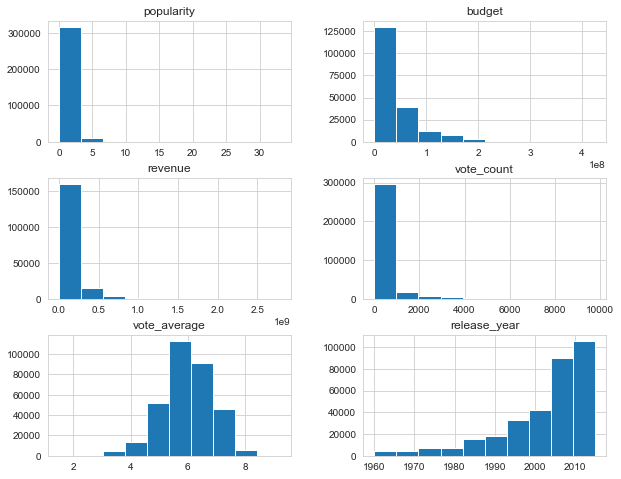

In [82]:
#visulaize histogram for each column
df.hist(figsize=(10, 8));

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Top ten most popular actors)

***Looking at the popularity for each actor***

In [83]:
def popular_actor (df):
 actors= df.groupby(['cast'], sort=False)['popularity'].max()
 top_actors=actors.nlargest(10)
 return(top_actors)

In [84]:
#display top ten most popular actors
popular_actor(df)

cast
Chris Pratt            32.985763
Bryce Dallas Howard    32.985763
Irrfan Khan            32.985763
Vincent D'Onofrio      32.985763
Nick Robinson          32.985763
Tom Hardy              28.419936
Charlize Theron        28.419936
Hugh Keays-Byrne       28.419936
Nicholas Hoult         28.419936
Josh Helman            28.419936
Name: popularity, dtype: float64

***Looking for top ten most popular actors***

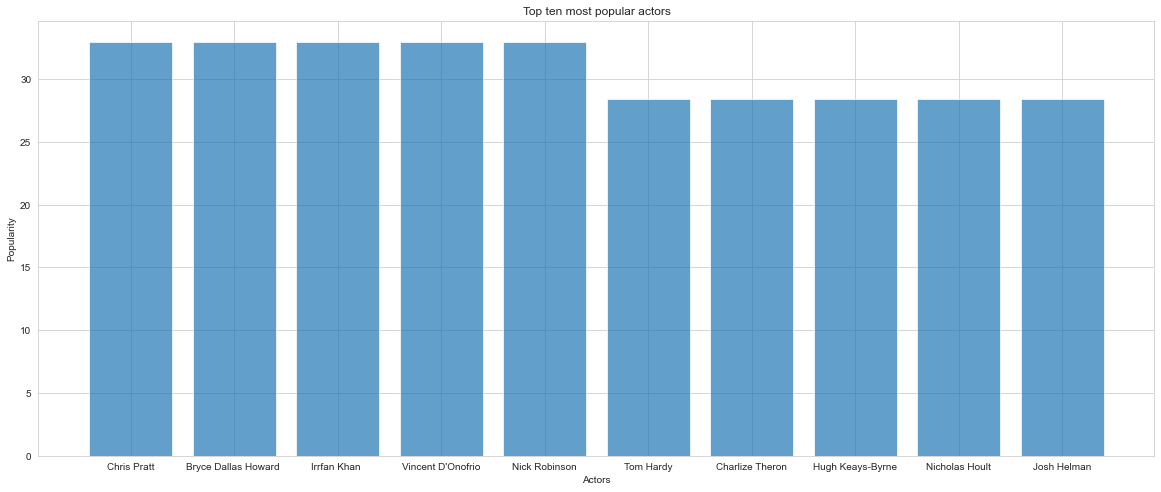

In [85]:
#Visulaize top ten most popular actors
plt.subplots(figsize=(20, 8))
plt.bar(["Chris Pratt", "Bryce Dallas Howard ","Irrfan Khan ", "Vincent D'Onofrio", "Nick Robinson", "Tom Hardy", "Charlize Theron", "Hugh Keays-Byrne", "Nicholas Hoult", "Josh Helman"],popular_actor(df), alpha=0.7 )
plt.title("Top ten most popular actors")
plt.xlabel("Actors")
plt.ylabel("Popularity");


### Research Question 2  (Top 10 most profitable Movies)

***Adding Profit column to The Dataset***

In [86]:
df["profit"]=df["revenue"] - df["budget"]


***Looking at the Proift for each Movie***

In [87]:
def movie (df):
 movies=df.groupby(['original_title'], sort=False)['profit'].max()
 top_movies=movies.nlargest(10)
 return(top_movies)

***Looking for top ten most profitable movies***

In [88]:
#display top ten most profitable movies using nalrgest function
movie(df)

original_title
Avatar                                          2.544506e+09
Star Wars: The Force Awakens                    1.868178e+09
Titanic                                         1.645034e+09
Jurassic World                                  1.363529e+09
Furious 7                                       1.316249e+09
The Avengers                                    1.299558e+09
Harry Potter and the Deathly Hallows: Part 2    1.202818e+09
Avengers: Age of Ultron                         1.125036e+09
Frozen                                          1.124219e+09
The Net                                         1.084280e+09
Name: profit, dtype: float64

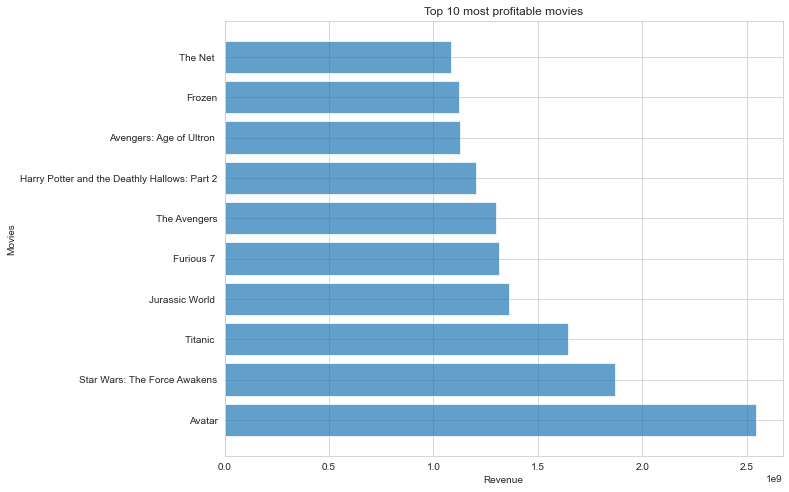

In [89]:
plt.subplots(figsize=(10, 8))
plt.barh(["Avatar","Star Wars: The Force Awakens","Titanic ", "Jurassic World ", "Furious 7 ", "The Avengers",  "Harry Potter and the Deathly Hallows: Part 2", "Avengers: Age of Ultron ", "Frozen", "The Net "],movie(df), alpha=0.7 )
plt.title("Top 10 most profitable movies",)
plt.ylabel("Movies")
plt.xlabel("Revenue");

### Research Question 3   (Relation between Budget and Vote Average )

***Looking at the correlation between Budget and Vote Average***

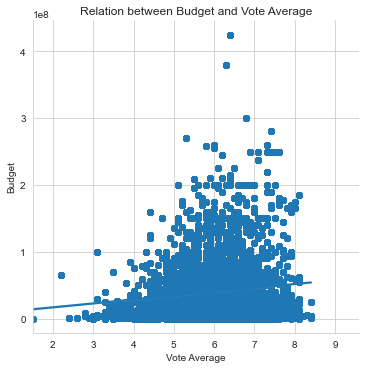

In [90]:
#Visulaize Relation between Budget and Vote Average
sns.lmplot(x="vote_average", y="budget", data=df)
plt.title("Relation between Budget and Vote Average")
plt.xlabel("Vote Average")
plt.ylabel("Budget");

**The Correlation between Budget and Vote Average is positive so, if we increace our Budjet, The Vote Average will also increase** 

### Research Question 4   (Top 10 most profitable genres)

***Looking at the Proift for each Genre***

In [91]:
def genre (df): 
 genres=df.groupby(['genres'], sort=False)['profit'].max()
 top_genres=genres.nlargest(10)
 return(top_genres)

***Looking for top 10 Genres***

In [92]:
#display top 10 Genres
genre(df)

genres
Action             2.544506e+09
Adventure          2.544506e+09
Science Fiction    2.544506e+09
Fantasy            2.544506e+09
Thriller           1.645034e+09
Drama              1.645034e+09
Romance            1.645034e+09
Crime              1.316249e+09
Family             1.202818e+09
Animation          1.124219e+09
Name: profit, dtype: float64

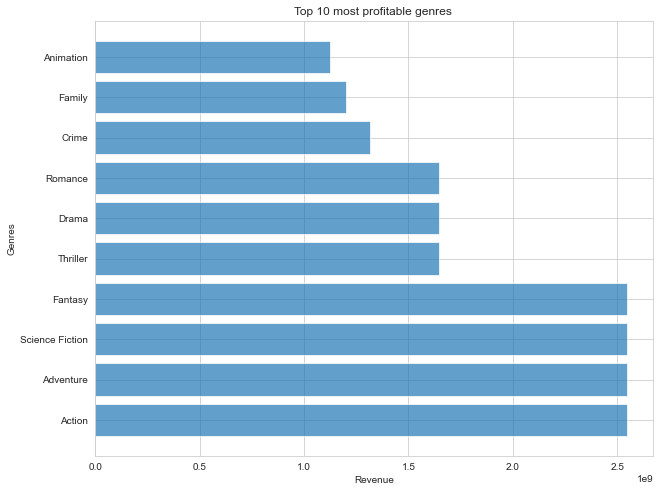

In [93]:
#visulaize top 10 Genres
plt.subplots(figsize=(10, 8))
plt.barh(["Action","Adventure","Science Fiction", "Fantasy","Thriller","Drama", "Romance", "Crime", "Family", "Animation"],genre(df), alpha=0.7 )
plt.title("Top 10 most profitable genres ",)
plt.ylabel("Genres")
plt.xlabel("Revenue");

### Research Question 5 (Top 10 Directors with the highest ratings)


***Looking for Vote Average for each Director***

In [94]:
def director (df): 
 directors=df.groupby("director")["vote_average"].max()
 top_directors=directors.nlargest(10)
 return(top_directors)

***Looking for Top 10 Directors with the highest ratings*** 

In [95]:
#display Top 10 Directors with the highest ratings 
director(df)


director
Mark Cousins              9.2
Jennifer Siebel Newsom    8.9
Carl Tibbetts             8.8
Derek Frankowski          8.8
David Mallet              8.7
Curt Morgan               8.5
James Payne               8.5
Martin Scorsese           8.5
Michael Henry Wilson      8.5
Saul Swimmer              8.5
Name: vote_average, dtype: float64

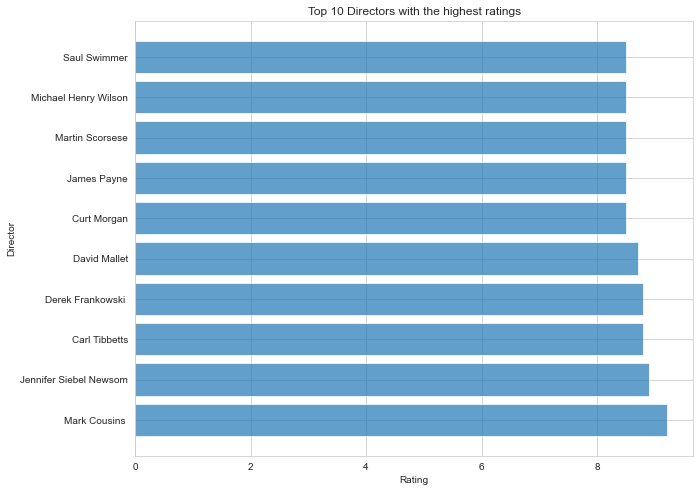

In [96]:
#visulaize Top 10 Directors with the highest ratings
plt.subplots(figsize=(10, 8))
plt.barh(["Mark Cousins ","Jennifer Siebel Newsom","Carl Tibbetts", "Derek Frankowski ", "David Mallet", "Curt Morgan","James Payne", "Martin Scorsese", "Michael Henry Wilson", "Saul Swimmer"],director(df), alpha=0.7)
plt.title("Top 10 Directors with the highest ratings")
plt.ylabel("Director")
plt.xlabel("Rating");

### Research Question 6   (Relation between Budget and Revenue)

**Looking at the correlation between Budget and Revenue**

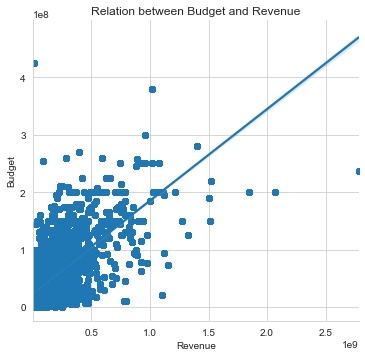

In [97]:
#visulaize correlation between Budget and Revenue
sns.lmplot(x="revenue", y="budget", data=df)
plt.title("Relation between Budget and Revenue")
plt.xlabel("Revenue")
plt.ylabel("Budget");

**The Correlation between Budget and Revenue is positive so, if we increace our Budjet, The Revenue will also increase** 

### Research Question 7   (Relation between Release Years and Revenue)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


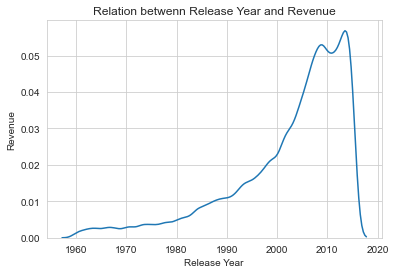

In [98]:
#Visulaize Relation between Release Years and Revenue 
sns.distplot(df["release_year"], df["revenue"], hist=False);
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.title("Relation betwenn Release Year and Revenue")
sns.set_style("whitegrid")
plt.show()



### It is quite clear that from 2005 to 2015 the most profits were made

### Research Question 8  (In which years were the largest number of movies produced?)

***Looking for Number of Movies for eaxh Year***

In [99]:
def year (df):
 years=df.groupby("release_year")["original_title"].count()
 top_years=years.nlargest(10)
 return (top_years)

***Looking for Years were the largest number of films produced***

In [100]:
#display In which years were the largest number of movies produced 
year(df)

release_year
2014    20353
2009    18511
2013    18447
2015    17900
2008    16983
2011    16684
2012    16509
2007    16252
2010    16039
2006    13979
Name: original_title, dtype: int64

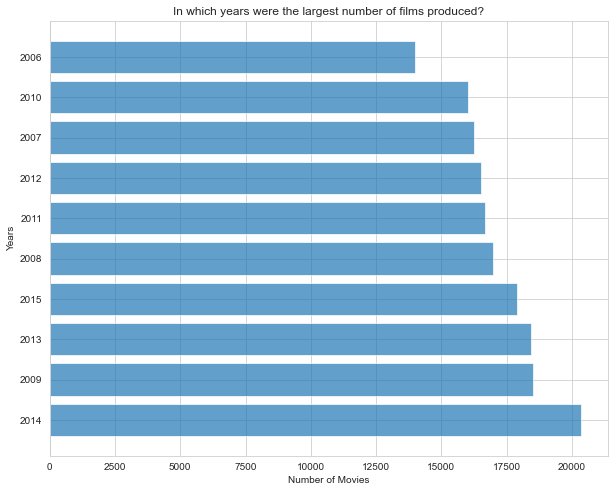

In [101]:
#Visulaize In which years were the largest number of movies produced
plt.subplots(figsize=(10, 8))
plt.barh(["2014","2009","2013", "2015", "2008", "2011","2012", "2007", "2010", "2006"],year(df), alpha=0.7)
plt.title("In which years were the largest number of films produced?")
plt.ylabel("Years")
plt.xlabel("Number of Movies");

### Research Question 9  (Top ten production Companies that produced movies )

***Looking for profit for each Producton Companies***

In [102]:
def company (df):
 companies=df.groupby("production_companies")["profit"].count()
 top_companies=companies.nlargest(10)
 return(top_companies)

***Looking for Top ten production Companies that produced movies***

In [103]:
#display Top ten production Companies that produced movies
company(df)

production_companies
Warner Bros.                              4995
Universal Pictures                        4545
Paramount Pictures                        3886
Twentieth Century Fox Film Corporation    3220
Walt Disney Pictures                      2700
Columbia Pictures                         2655
New Line Cinema                           2035
Metro-Goldwyn-Mayer (MGM)                 1550
Touchstone Pictures                       1510
Columbia Pictures Corporation             1465
Name: profit, dtype: int64

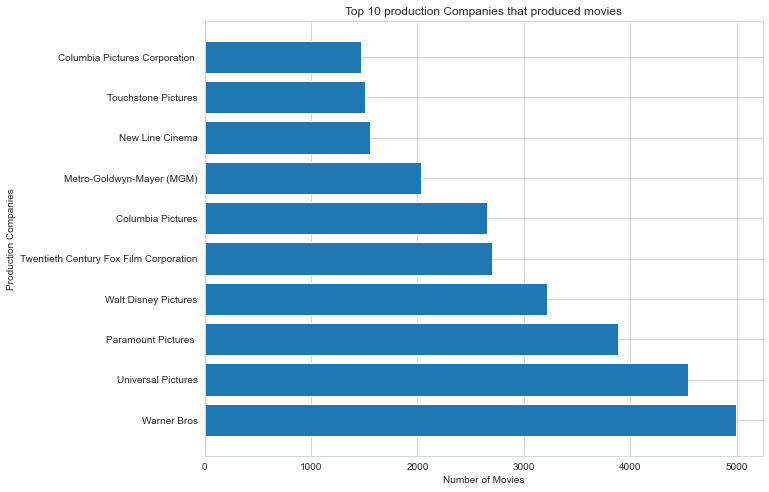

In [104]:
#Visulaize Top ten production Companies that produced movies
plt.subplots(figsize=(10, 8))
plt.barh(["Warner Bros", "Universal Pictures", "Paramount Pictures ","Walt Disney Pictures", "Twentieth Century Fox Film Corporation", "Columbia Pictures", "Metro-Goldwyn-Mayer (MGM)","New Line Cinema", "Touchstone Pictures", "Columbia Pictures Corporation " ],company(df))
plt.title("Top 10 production Companies that produced movies")
plt.ylabel("Production Companies")
plt.xlabel("Number of Movies");

<a id='conclusions'></a>
## Conclusions

1. Chris Prat is the most popular actor
2. Avatar is the most profitable movie
3. The Correlation between Budget and Vote Average is positive so, if we increace our Budjet, The Vote Average will also increase a little bit
4. Action is the most profitable genre
5. Mark Cousins is the most director with the highest ratings
6. The Correlation between Budget and Revenue is slightly positive so, if we increace our Budjet, The Revenue will also increase a little bit
7. 2014 was the most profitabel year 
8. In 2014 the largest number of movies was produced
9. Warner Bros is the most production Companies that produced movies

### Limitations:
1. There was many zero values which made an effect at the dataset and i replace them with nan values
2. I filled nan values with mean so, this will make the dataset not very accurate 
  

## Sources:
1. [Pandas](https://pandas.pydata.org/docs/)
2. [Numpy](https://numpy.org/doc/)
3. [Kraggle](https://www.kaggle.com/)
4. [Stack Overflow](https://stackoverflow.com/)